In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt
%matplotlib inline  
import matplotlib.pyplot as plt
import pandas_profiling

In [3]:
df = pd.read_csv('data.csv')

In [4]:
df.head()

,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


 - sex - пол
 - age - возраст
 - suicides_no - кол-во суицидов
 - population - население
 - suicides/100k pop - индекс суицидности (suicides_no/population)
 - country-year - страна и год исследования
 - HDI for year - индекс человеческого развития
 - gdp_for_year - внутренний валовый продукт за год
 - gdp_per_capita - внутренний валовый продукт на душу населения
 - generation(based on age grouping average) - поколение (зависит от возрастной группы)

Видим, что переменную country-year содержит информацию о двух разных категориях: страна и год. Разобьем ее на две части.

In [5]:
df['year']=df['country-year'].apply(lambda row: int(row[-4:]))

In [6]:
df['country']=df['country-year'].apply(lambda row: row[:-4])

In [7]:
df.head()

,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation,year,country
0,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X,1987,Albania
1,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent,1987,Albania
2,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X,1987,Albania
3,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation,1987,Albania
4,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers,1987,Albania


In [8]:
df.shape

(27820, 12)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
sex                   27820 non-null object
age                   27820 non-null object
suicides_no           27820 non-null int64
population            27820 non-null int64
suicides/100k pop     27820 non-null float64
country-year          27820 non-null object
HDI for year          8364 non-null float64
 gdp_for_year ($)     27820 non-null object
gdp_per_capita ($)    27820 non-null int64
generation            27820 non-null object
year                  27820 non-null int64
country               27820 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


Видим, что _gdp_for_year_ - object. Испарвим на int

In [10]:
df[' gdp_for_year ($) ']=df[' gdp_for_year ($) '].apply(lambda row: int(row.replace(',','')))

In [11]:
df.describe()

,suicides_no,population,suicides/100k pop,HDI for year,gdp_for_year ($),gdp_per_capita ($),year
count,27820.000000,2.782000e+04,27820.000000,8364.000000,2.782000e+04,27820.000000,27820.000000
mean,242.574407,1.844794e+06,12.816097,0.776601,4.455810e+11,16866.464414,2001.258375
std,902.047917,3.911779e+06,18.961511,0.093367,1.453610e+12,18887.576472,8.469055
min,0.000000,2.780000e+02,0.000000,0.483000,4.691962e+07,251.000000,1985.000000
25%,3.000000,9.749850e+04,0.920000,0.713000,8.985353e+09,3447.000000,1995.000000
50%,25.000000,4.301500e+05,5.990000,0.779000,4.811469e+10,9372.000000,2002.000000
75%,131.000000,1.486143e+06,16.620000,0.855000,2.602024e+11,24874.000000,2008.000000
max,22338.000000,4.380521e+07,224.970000,0.944000,1.812071e+13,126352.000000,2016.000000


In [12]:
df.isnull().sum()

sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
year                      0
country                   0
dtype: int64

Судя по описанию, suicides/100k pop = suicides_no/population. Проверим гипотезу.

In [13]:
df['index']=df['suicides_no']/df['population']*100000

In [14]:
df['index']=df['index'].apply(lambda row: round(row,2))

In [15]:
df['check'] = np.where(df['index'] != df['suicides/100k pop'], 1, 0)

In [16]:
df.query('check==1').shape

(5, 14)

In [17]:
df.query('check==1')

,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation,year,country,index,check
15355,male,55-74 years,13,32000,40.63,Luxembourg1989,NaN,10391504709,29239,G.I. Generation,1989,Luxembourg,40.62,1
15384,male,15-24 years,4,25600,15.63,Luxembourg1991,NaN,14321878795,39465,Generation X,1991,Luxembourg,15.62,1
15942,male,75+ years,1,6400,15.63,Malta1996,NaN,3570271558,10254,G.I. Generation,1996,Malta,15.62,1
18270,female,25-34 years,3,160000,1.88,Panama1985,0.648,6541517100,3443,Boomers,1985,Panama,1.87,1
19746,female,35-54 years,13,416000,3.13,Puerto Rico1990,NaN,30603919000,9552,Silent,1990,Puerto Rico,3.12,1


In [18]:
del df['check']
del df['index']

Вывод: действительно, suicides/100k pop = suicides_no/population.

In [19]:
df.head()

,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation,year,country
0,male,15-24 years,21,312900,6.71,Albania1987,NaN,2156624900,796,Generation X,1987,Albania
1,male,35-54 years,16,308000,5.19,Albania1987,NaN,2156624900,796,Silent,1987,Albania
2,female,15-24 years,14,289700,4.83,Albania1987,NaN,2156624900,796,Generation X,1987,Albania
3,male,75+ years,1,21800,4.59,Albania1987,NaN,2156624900,796,G.I. Generation,1987,Albania
4,male,25-34 years,9,274300,3.28,Albania1987,NaN,2156624900,796,Boomers,1987,Albania


Предположим, что gdp_per_capita=gdp_for_year/population по всем категориям людей

In [20]:
sum_pop=pd.Series(df.groupby(['country-year']).sum()['population'])

In [21]:
def sum_pop_func(row):
    return sum_pop[row]

In [22]:
df['sum_population']=df['country-year'].apply(lambda row: sum_pop_func(row))

In [23]:
df['sum_pop']=df[' gdp_for_year ($) ']//df['sum_population']

In [25]:
df['sum_pop']=df['gdp_per_capita ($)'] - df['sum_pop']

In [26]:
df.describe()

,suicides_no,population,suicides/100k pop,HDI for year,gdp_for_year ($),gdp_per_capita ($),year,sum_population,sum_pop
count,27820.000000,2.782000e+04,27820.000000,8364.000000,2.782000e+04,27820.000000,27820.000000,2.782000e+04,27820.000000
mean,242.574407,1.844794e+06,12.816097,0.776601,4.455810e+11,16866.464414,2001.258375,2.212803e+07,-19.334723
std,902.047917,3.911779e+06,18.961511,0.093367,1.453610e+12,18887.576472,8.469055,4.168630e+07,340.949486
min,0.000000,2.780000e+02,0.000000,0.483000,4.691962e+07,251.000000,1985.000000,2.519200e+04,-10835.000000
25%,3.000000,9.749850e+04,0.920000,0.713000,8.985353e+09,3447.000000,1995.000000,1.996086e+06,0.000000
50%,25.000000,4.301500e+05,5.990000,0.779000,4.811469e+10,9372.000000,2002.000000,5.360200e+06,1.000000
75%,131.000000,1.486143e+06,16.620000,0.855000,2.602024e+11,24874.000000,2008.000000,2.061077e+07,1.000000
max,22338.000000,4.380521e+07,224.970000,0.944000,1.812071e+13,126352.000000,2016.000000,3.000785e+08,1.000000


In [28]:
del df['sum_pop']

Вывод: gdp_per_capita=gdp_for_year/population по всем категориям людей.

In [29]:
df.head()

,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation,year,country,sum_population
0,male,15-24 years,21,312900,6.71,Albania1987,NaN,2156624900,796,Generation X,1987,Albania,2709600
1,male,35-54 years,16,308000,5.19,Albania1987,NaN,2156624900,796,Silent,1987,Albania,2709600
2,female,15-24 years,14,289700,4.83,Albania1987,NaN,2156624900,796,Generation X,1987,Albania,2709600
3,male,75+ years,1,21800,4.59,Albania1987,NaN,2156624900,796,G.I. Generation,1987,Albania,2709600
4,male,25-34 years,9,274300,3.28,Albania1987,NaN,2156624900,796,Boomers,1987,Albania,2709600


Предположим, что generation определяется годом и возрастной группой.

In [30]:
year_max=pd.Series(df.groupby(['generation' , 'age']).max()['year'])

In [31]:
year_min=pd.Series(df.groupby(['generation' , 'age']).min()['year'])

In [32]:
for i in year_max.index:
    print(i, year_min[i],year_max[i],year_max[i]-year_min[i])

('Boomers', '25-34 years') 1985 1994 9
('Boomers', '35-54 years') 1991 2009 18
('Boomers', '55-74 years') 2011 2016 5
('G.I. Generation', '55-74 years') 1985 1990 5
('G.I. Generation', '75+ years') 1985 2000 15
('Generation X', '15-24 years') 1985 2000 15
('Generation X', '25-34 years') 1995 2010 15
('Generation X', '35-54 years') 2010 2016 6
('Generation X', '5-14 years') 1985 1990 5
('Generation Z', '5-14 years') 2007 2015 8
('Millenials', '15-24 years') 2001 2016 15
('Millenials', '25-34 years') 2011 2016 5
('Millenials', '5-14 years') 1991 2006 15
('Silent', '35-54 years') 1985 1990 5
('Silent', '55-74 years') 1991 2010 19
('Silent', '75+ years') 2001 2016 15


Поколения появляются последовательно, изменим их на ранги следующим образом:
 - 'G.I. Generation' 1 (85ый год - минимум 55 лет)
 - 'Silent' 2 (85ый год - минимум 35 лет)
 - 'Boomers' 4 (85ый год - минимум 25 лет)
 - 'Generation X' 3 (85ый год - минимум 15 лет)
 - 'Millenials' 5 (2001ый год - минимум 15 лет)
 - 'Generation Z' 6 (2007ый год - минимум 5 лет)

In [63]:
gen_index = {'G.I. Generation':1,'Silent':2 ,'Boomers':3 ,'Generation X':4,'Millenials':5,'Generation Z':6}

In [66]:
def gen_index_func(row):
    return gen_index[row]

In [68]:
df['gen_index']=df['generation'].apply(lambda row: gen_index_func(row))

Возрастные группы появляются последовательно, изменим их на ранги следующим образом:
 - '5-14 years' 1 
 - '15-24 years' 2
 - '25-34 years' 3
 - '35-54 years' 4
 - '55-74 years' 5
 - '75+ years' 6

In [69]:
age_index = {'5-14 years':1,'15-24 years':2 ,'25-34 years':3 ,'35-54 years':4,'55-74 years':5,'75+ years':6}

In [70]:
def age_index_func(row):
    return age_index[row]

In [71]:
df['age_index']=df['age'].apply(lambda row: age_index_func(row))

In [72]:
df.head()

,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation,year,country,sum_population,median_pop,country_index,gdp_sq,HDI,gen_index,age_index
0,male,15-24 years,21,312900,6.71,Albania1987,NaN,2156624900,796,Generation X,1987,Albania,2709600,2805200.0,21933,46439.475665,0.671072,4,2
1,male,35-54 years,16,308000,5.19,Albania1987,NaN,2156624900,796,Silent,1987,Albania,2709600,2805200.0,21933,46439.475665,0.671072,2,4
2,female,15-24 years,14,289700,4.83,Albania1987,NaN,2156624900,796,Generation X,1987,Albania,2709600,2805200.0,21933,46439.475665,0.671072,4,2
3,male,75+ years,1,21800,4.59,Albania1987,NaN,2156624900,796,G.I. Generation,1987,Albania,2709600,2805200.0,21933,46439.475665,0.671072,1,6
4,male,25-34 years,9,274300,3.28,Albania1987,NaN,2156624900,796,Boomers,1987,Albania,2709600,2805200.0,21933,46439.475665,0.671072,3,3


Посмотрим, кто больше совершает самоубийства - мужчины или женщины?

In [76]:
pd.Series(df.groupby(['sex']).sum()['suicides_no'])

sex
female    1559510
male      5188910
Name: suicides_no, dtype: int64

Вывод: мужчинам присвоим 1 как полу, для которых самоубийства более характерны, а женщинам 0.

In [78]:
age_index = {'male':1,'female':0}

In [79]:
def sex_index_func(row):
    return age_index[row]

In [80]:
df['sex_index']=df['sex'].apply(lambda row: sex_index_func(row))

Перекодируем переменную country в ранг медианы числа жителей по всем годам

In [81]:
median_pop=pd.Series(df.groupby(['country']).median()['sum_population'])

In [82]:
def median_pop_func(row):
    return median_pop[row]

In [83]:
df['median_pop']=df['country'].apply(lambda row: median_pop_func(row))

In [84]:
contries=df[['median_pop','country']].drop_duplicates()

In [85]:
contries['rank']=contries.sort_values(['median_pop']).index+1

In [86]:
cont_dict = pd.Series(contries['rank'].values, index=contries['country'])

In [87]:
def country_index_func(row):
    return cont_dict[row]

In [88]:
df['country_index']=df['country'].apply(lambda row: country_index_func(row))

In [89]:
df.head()

,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation,year,country,sum_population,median_pop,country_index,gdp_sq,HDI,gen_index,age_index,sex_index
0,male,15-24 years,21,312900,6.71,Albania1987,NaN,2156624900,796,Generation X,1987,Albania,2709600,2805200.0,21933,46439.475665,0.671072,4,2,1
1,male,35-54 years,16,308000,5.19,Albania1987,NaN,2156624900,796,Silent,1987,Albania,2709600,2805200.0,21933,46439.475665,0.671072,2,4,1
2,female,15-24 years,14,289700,4.83,Albania1987,NaN,2156624900,796,Generation X,1987,Albania,2709600,2805200.0,21933,46439.475665,0.671072,4,2,0
3,male,75+ years,1,21800,4.59,Albania1987,NaN,2156624900,796,G.I. Generation,1987,Albania,2709600,2805200.0,21933,46439.475665,0.671072,1,6,1
4,male,25-34 years,9,274300,3.28,Albania1987,NaN,2156624900,796,Boomers,1987,Albania,2709600,2805200.0,21933,46439.475665,0.671072,3,3,1


Предскажем переменную HDI

In [90]:
df_HDI=df.loc[df['HDI for year']>0]

In [91]:
df_HDI.head()

,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation,year,country,sum_population,median_pop,country_index,gdp_sq,HDI,gen_index,age_index,sex_index
72,male,25-34 years,13,232900,5.58,Albania1995,0.619,2424499009,835,Generation X,1995,Albania,2903400,2805200.0,21933,49239.201953,0.688102,4,3,1
73,male,55-74 years,9,178000,5.06,Albania1995,0.619,2424499009,835,Silent,1995,Albania,2903400,2805200.0,21933,49239.201953,0.688102,2,5,1
74,female,75+ years,2,40800,4.90,Albania1995,0.619,2424499009,835,G.I. Generation,1995,Albania,2903400,2805200.0,21933,49239.201953,0.688102,1,6,0
75,female,15-24 years,13,283500,4.59,Albania1995,0.619,2424499009,835,Generation X,1995,Albania,2903400,2805200.0,21933,49239.201953,0.688102,4,2,0
76,male,15-24 years,11,241200,4.56,Albania1995,0.619,2424499009,835,Generation X,1995,Albania,2903400,2805200.0,21933,49239.201953,0.688102,4,2,1


HDI может зависеть от sum_population (по годам и странам), gdp, year, country_index

In [92]:
df_HDI=df_HDI[[ ' gdp_for_year ($) ','country_index','sum_population','year','HDI for year']]

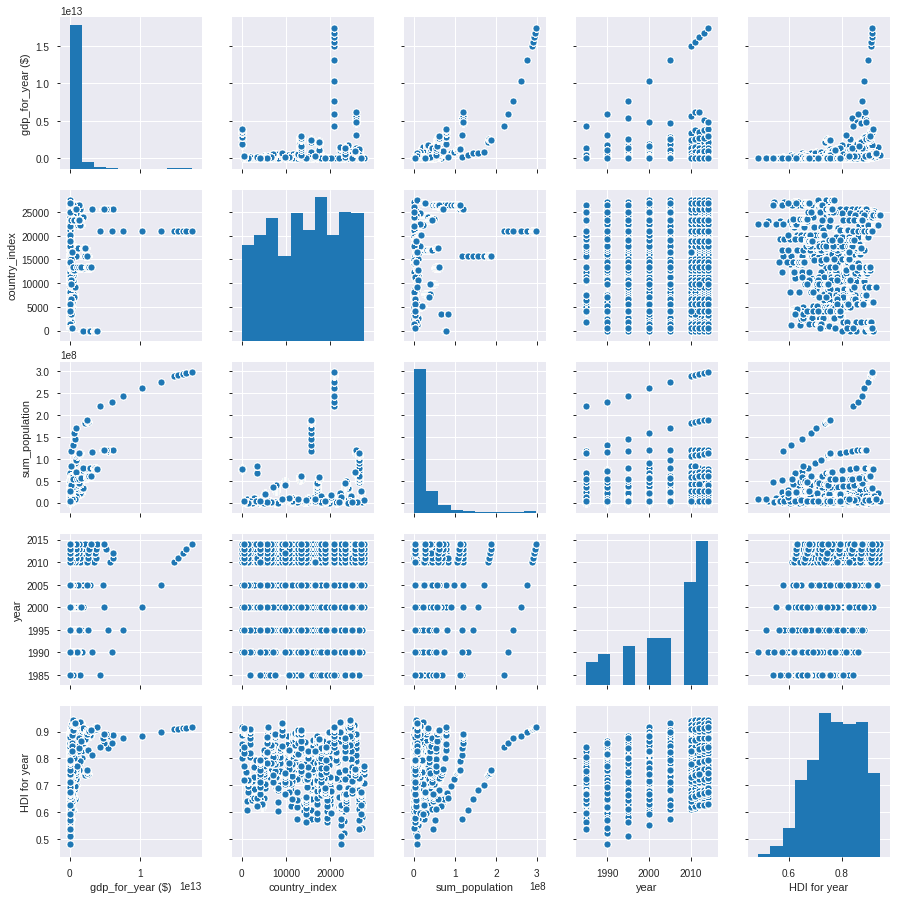

In [93]:
plt=sns.pairplot(df_HDI)

Есть мысль, что HDI похож на график горня из GDP

In [94]:
df_HDI['gdp_sq']=df_HDI[' gdp_for_year ($) ']** 0.5

In [95]:
cols=[
 ' gdp_for_year ($) ',
'country_index',
'sum_population',
'year',
'gdp_sq']

In [96]:
from sklearn.model_selection import train_test_split

In [97]:
X=df_HDI[cols].values
y=df_HDI[['HDI for year']].values

In [98]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

In [99]:
from sklearn.linear_model import LinearRegression

In [100]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, r2_score

In [101]:
slr = LinearRegression()

slr.fit(X_train, y_train) #обучили обучающую выборку (а что тут еще скажешь, такая вот тавтология)
y_train_pred = slr.predict(X_train) #получаем предсказанные значения для обучающей выборки
y_test_pred = slr.predict(X_test) #получаем предсказанные значения для тестовой выборки


In [102]:
print('MSE train linear model: {:.3f}, test: {:.3f}'.format(
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train linear model: {:.3f}, test: {:.3f}'.format(
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train linear model: 0.003, test: 0.003
R^2 train linear model: 0.611, test: 0.602


Добавим предсказанные HDI в анализируемые данные.

In [103]:
df['gdp_sq']=df[' gdp_for_year ($) ']** 0.5

In [104]:
X=df[cols].values

In [105]:
y_df = slr.predict(X)

In [106]:
df['HDI']=y_df

Подготовим данные, по которым будем строить модель.

In [108]:
df.head()

,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation,year,country,sum_population,median_pop,country_index,gdp_sq,HDI,gen_index,age_index,sex_index
0,male,15-24 years,21,312900,6.71,Albania1987,NaN,2156624900,796,Generation X,1987,Albania,2709600,2805200.0,21933,46439.475665,0.671072,4,2,1
1,male,35-54 years,16,308000,5.19,Albania1987,NaN,2156624900,796,Silent,1987,Albania,2709600,2805200.0,21933,46439.475665,0.671072,2,4,1
2,female,15-24 years,14,289700,4.83,Albania1987,NaN,2156624900,796,Generation X,1987,Albania,2709600,2805200.0,21933,46439.475665,0.671072,4,2,0
3,male,75+ years,1,21800,4.59,Albania1987,NaN,2156624900,796,G.I. Generation,1987,Albania,2709600,2805200.0,21933,46439.475665,0.671072,1,6,1
4,male,25-34 years,9,274300,3.28,Albania1987,NaN,2156624900,796,Boomers,1987,Albania,2709600,2805200.0,21933,46439.475665,0.671072,3,3,1


 - переменные sex, age, country перекодировали.
 - country-year разбили на две переменные
 - suicides_no явным образом восстанавливает таргет с учетом population
 - gdp_per_capita зависит от gdp_for_year с учетом population
 - HDI for year предсказали в hdi
 - год пока учитывать не будем, так как сам по себе он инфы не несет
 - sum_population, median_pop, gdp_sq были вспомогательными переменными

In [286]:
columns=[
 'population',
 ' gdp_for_year ($) ',
 'country_index',
 'HDI',
 'gen_index',
 'age_index',
 'sex_index',
    'year',
'suicides/100k pop',
]

In [334]:
data_new=df[columns]

In [329]:
import pandas_profiling

In [335]:
data_new.profile_report()

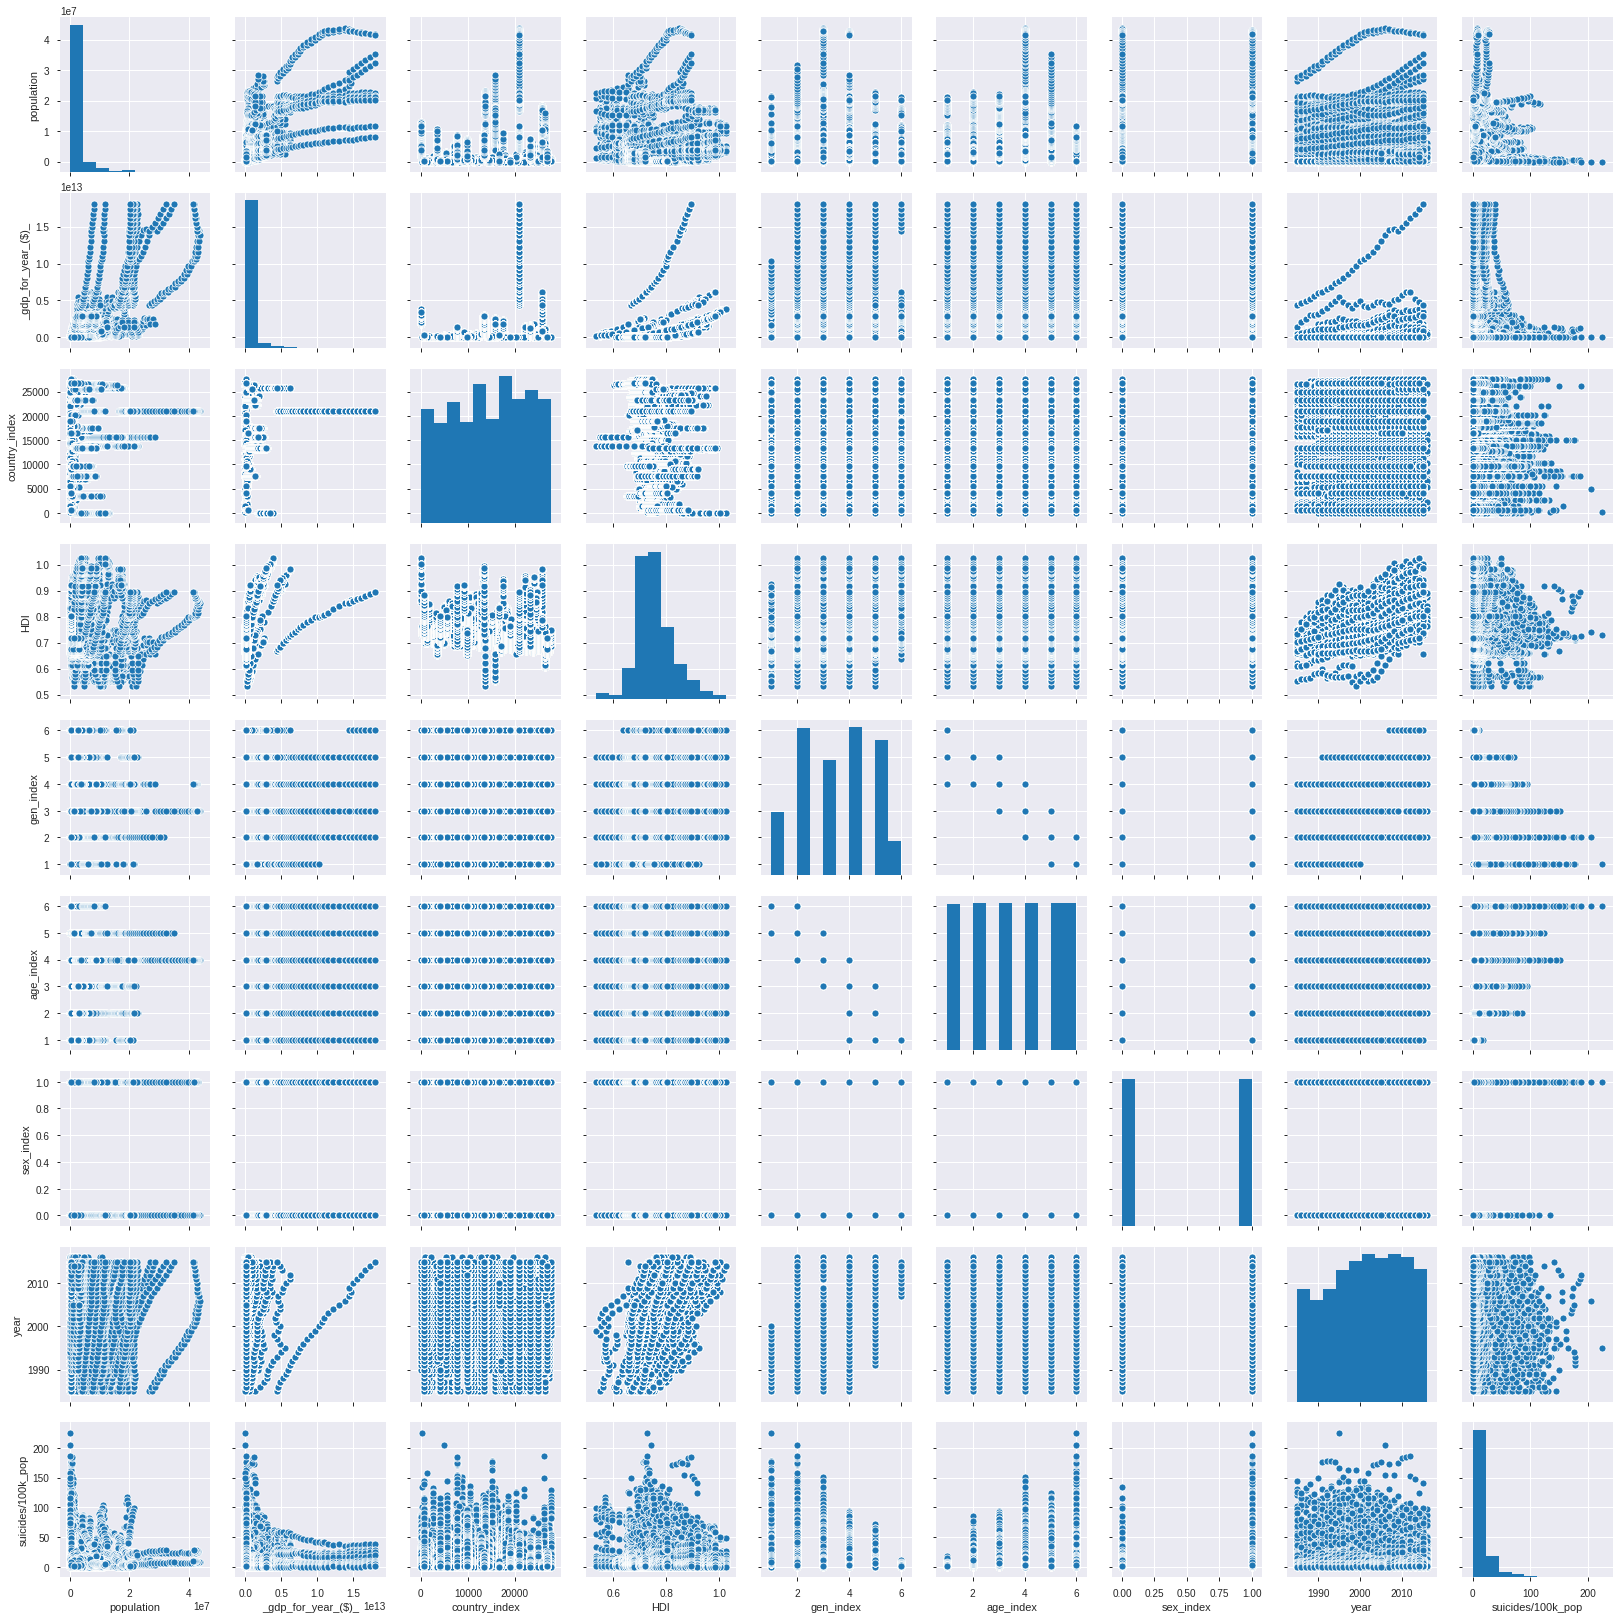

In [336]:
sns.pairplot(data_new)

Видна связь таргета с  gdp_for_year ($), gen, age, sex.

Распределение suicides/100k pop похоже на 1/GDP

In [339]:
data_new['_gdp_for_year_($)_']=data_new['_gdp_for_year_($)_'].apply(lambda row: 1/row)

Стандартизируем данные.

In [295]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
scaler.fit(data_new)
data_new_3 = scaler.transform(data_new)
data_new_3= pd.DataFrame(data_new_3, index=data_new_3[:,0], columns = list(data_new))

In [340]:
data_new_3.head()

,population,gdp_for_year ($),country_index,HDI,gen_index,age_index,sex_index,year,suicides/100k pop
-0.391617,-0.391617,0.119082,0.966287,-1.222115,0.433847,-0.880574,1.0,-1.683615,-0.322032
-0.392870,-0.392870,0.119082,0.966287,-1.222115,-0.972378,0.291278,1.0,-1.683615,-0.402196
-0.397548,-0.397548,0.119082,0.966287,-1.222115,0.433847,-0.880574,-1.0,-1.683615,-0.421182
-0.466035,-0.466035,0.119082,0.966287,-1.222115,-1.675491,1.463130,1.0,-1.683615,-0.433839
-0.401485,-0.401485,0.119082,0.966287,-1.222115,-0.269265,-0.294648,1.0,-1.683615,-0.502928


In [341]:
data_new_3.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 27820 entries, -0.3916174654489497 to -0.10375480468797947
Data columns (total 9 columns):
population            27820 non-null float64
 gdp_for_year ($)     27820 non-null float64
country_index         27820 non-null float64
HDI                   27820 non-null float64
gen_index             27820 non-null float64
age_index             27820 non-null float64
sex_index             27820 non-null float64
year                  27820 non-null float64
suicides/100k pop     27820 non-null float64
dtypes: float64(9)
memory usage: 2.1 MB


In [342]:
data_new_3.describe()

,population,gdp_for_year ($),country_index,HDI,gen_index,age_index,sex_index,year,suicides/100k pop
count,27820.000000,2.782000e+04,2.782000e+04,2.782000e+04,2.782000e+04,2.782000e+04,27820.000000,2.782000e+04,2.782000e+04
mean,0.000000,-5.721121e-17,-9.807635e-17,5.353334e-16,1.266820e-16,-6.239916e-17,0.000000,-4.356225e-15,-1.900229e-16
std,1.000018,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018,1.000018e+00,1.000018e+00
min,-0.471537,-2.258754e-01,-1.810608e+00,-3.177884e+00,-1.675491e+00,-1.466500e+00,-1.000000,-1.919774e+00,-6.759128e-01
25%,-0.446683,-2.230570e-01,-8.379605e-01,-6.549003e-01,-9.723781e-01,-8.805741e-01,-1.000000,-7.389830e-01,-6.273926e-01
50%,-0.361643,-2.104528e-01,2.276070e-02,-1.627840e-01,-2.692654e-01,2.912782e-01,0.000000,8.757034e-02,-3.600040e-01
75%,-0.091686,-1.431115e-01,8.812029e-01,5.115014e-01,1.136960e+00,8.772043e-01,1.000000,7.960446e-01,2.006154e-01
max,10.726876,1.563167e+01,1.678364e+00,3.852537e+00,1.840073e+00,1.463130e+00,1.000000,1.740677e+00,1.118886e+01


Приступим к обучению модели.

In [202]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, r2_score

In [296]:
X=data_new_3.iloc[:,0:8]
y=data_new_3['suicides/100k pop']

In [297]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0) #разделили на тестовые данные и обучающие (3:7)

1. Простая линейная модель

In [298]:
slr = LinearRegression()

slr.fit(X_train, y_train) #обучили обучающую выборку (а что тут еще скажешь, такая вот тавтология)
y_train_pred = slr.predict(X_train) #получаем предсказанные значения для обучающей выборки
y_test_pred = slr.predict(X_test) #получаем предсказанные значения для тестовой выборки

In [299]:
slr.coef_

array([ 0.03290376, -0.06797879, -0.03974706,  0.04563201,  0.16111498,
        0.51415875,  0.39471316, -0.12710695])

In [300]:
print('MSE train linear model: {:.3f}, test: {:.3f}'.format(
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train linear model: {:.3f}, test: {:.3f}'.format(
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train linear model: 0.711, test: 0.684
R^2 train linear model: 0.300, test: 0.291


2. Метод главных компонент + линейная модель

In [301]:
pca = PCA(n_components=4)
pca.fit(X_train)
X_train_pca=pca.transform(X_train) 
X_test_pca=pca.transform(X_test)

In [302]:
slr = LinearRegression()

slr.fit(X_train_pca, y_train) #обучили обучающую выборку
y_train_pred = slr.predict(X_train_pca) #получаем предсказанные значения для обучающей выборки
y_test_pred = slr.predict(X_test_pca) #получаем предсказанные значения для тестовой выборки

In [303]:
print('MSE train linear model: {:.3f}, test: {:.3f}'.format(
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train linear model: {:.3f}, test: {:.3f}'.format(
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train linear model: 0.721, test: 0.695
R^2 train linear model: 0.290, test: 0.280


3. Линейная модель + Лассо регуляризация

In [310]:
lml = linear_model.Lasso(alpha=0.1)

lml.fit(X_train, y_train) #обучили обучающую выборку (а что тут еще скажешь, такая вот тавтология)
y_train_pred = lml.predict(X_train) #получаем предсказанные значения для обучающей выборки
y_test_pred = lml.predict(X_test) #получаем предсказанные значения для тестовой выборки

In [311]:
print('MSE train Lasso linear model: {:.3f}, test: {:.3f}'.format(
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train Lasso linear model: {:.3f}, test: {:.3f}'.format(
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train Lasso linear model: 0.743, test: 0.712
R^2 train Lasso linear model: 0.268, test: 0.262


4. Линейная модель + Ридж регуляризация

In [314]:
lmr = linear_model.Ridge(alpha=0.1)

lmr.fit(X_train, y_train) #обучили обучающую выборку (а что тут еще скажешь, такая вот тавтология)
y_train_pred = lmr.predict(X_train) #получаем предсказанные значения для обучающей выборки
y_test_pred = lmr.predict(X_test) #получаем предсказанные значения для тестовой выборки

In [315]:
print('MSE train Ridge linear model: {:.3f}, test: {:.3f}'.format(
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train Ridge linear model: {:.3f}, test: {:.3f}'.format(
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train Ridge linear model: 0.711, test: 0.684
R^2 train Ridge linear model: 0.300, test: 0.291


5. Линейная модель + полиномы степени 2 и 3

In [316]:
quadratic = PolynomialFeatures(degree=2)
cubic = PolynomialFeatures(degree=3)
X_train_quad = quadratic.fit_transform(X_train)
X_train_cubic = cubic.fit_transform(X_train)
X_test_quad = quadratic.fit_transform(X_test)
X_test_cubic = cubic.fit_transform(X_test)

In [317]:
slr = LinearRegression()

slr.fit(X_train_quad, y_train) #обучили обучающую выборку (а что тут еще скажешь, такая вот тавтология)
y_train_pred = slr.predict(X_train_quad) #получаем предсказанные значения для обучающей выборки
y_test_pred = slr.predict(X_test_quad) #получаем предсказанные значения для тестовой выборки

In [318]:
print('MSE train quadratic linear model: {:.3f}, test: {:.3f}'.format(
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train quadratic linear model: {:.3f}, test: {:.3f}'.format(
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train quadratic linear model: 0.626, test: 0.611
R^2 train quadratic linear model: 0.384, test: 0.366


In [319]:
slr = LinearRegression()

slr.fit(X_train_cubic, y_train) #обучили обучающую выборку (а что тут еще скажешь, такая вот тавтология)
y_train_pred = slr.predict(X_train_cubic) #получаем предсказанные значения для обучающей выборки
y_test_pred = slr.predict(X_test_cubic) #получаем предсказанные значения для тестовой выборки

In [320]:
print('MSE train cubic linear model: {:.3f}, test: {:.3f}'.format(
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train cubic linear model: {:.3f}, test: {:.3f}'.format(
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train cubic linear model: 0.561, test: 0.562
R^2 train cubic linear model: 0.448, test: 0.417


5. Линейная модель с Ридж регуляризацией + полином степени 5

In [328]:
tic = PolynomialFeatures(degree=5)
X_train_10 = tic.fit_transform(X_train)
X_test_10 = tic.fit_transform(X_test)

slr = linear_model.Ridge(alpha=0.2)

slr.fit(X_train_10, y_train) #обучили обучающую выборку (а что тут еще скажешь, такая вот тавтология)
y_train_pred = slr.predict(X_train_10) #получаем предсказанные значения для обучающей выборки
y_test_pred = slr.predict(X_test_10) #получаем предсказанные значения для тестовой выборки

print('MSE train cubic linear model: {:.3f}, test: {:.3f}'.format(
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train cubic linear model: {:.3f}, test: {:.3f}'.format(
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))


MSE train cubic linear model: 0.426, test: 0.461
R^2 train cubic linear model: 0.580, test: 0.522


Это мое лучше предсказание=))